# Cargue de librerías

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from sklearn.metrics import classification_report

# Cargue de la base de datos

In [ ]:
data = pd.read_excel('BO_HeartData.xlsx')
data = data.drop(['Unnamed: 0'], 1)
print(data.shape)
data.head()

(303, 14)


<ipython-input-134-e2975328d0ca>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data = data.drop(['Unnamed: 0'], 1)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Entendimiento de los datos

In [135]:
data['target'].value_counts(True) # El 54% presenta presencia del atributo, presentar una enfermedad del corazón. Mientras que el 45% no presenta enfermedad del corazón

1    0.544554
0    0.455446
Name: target, dtype: float64

In [136]:
print(data.info()) # Hay 5 variables numéricas de un total de 13 variables
numericas = ['age', 'trestbps','chol','thalach','oldpeak']
data[numericas].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Son 5 variables numéricas, a saber: age, trestbps, chol, thalach y oldpeak. La media de la edad es de 54 años, con una desviación estándar aproximada de 9 años. El trestbps tiene un promedio de 131,62 mm Hg con una desviación estándar de 17,5 mm Hg. El Chol tiene un promedio de 246,2 mg/dl y una desviación estándar de 54,8 mg/dl. El thalach tiene un promedio de 149,6 y una desviación estándar de 22,9. Por último, el oldpeak tiene un promedio de 1 y una desviación estándar de 1,16.

Para age el máximo es de 77 años y mínimo de 29 años. Para el trestbps el máximo es de 200 mm Hg y el mínimo de 94 mm Hg. para el chol el máximo es de 564 mg/dl y el mínimo es de 126 mg/dl. Para el thalach el máximo es de 202 y el mínimo de 71. Por último para el oldpeak el máximo es de 6,2 y el mínimo de 0.

In [137]:
categoricas = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
data[categoricas] # Hay un total de 8 variables categóricas

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2
...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3
299,1,3,0,1,0,1,0,3
300,1,0,1,1,0,1,2,3
301,1,0,0,1,1,1,1,3


In [138]:
print(data['ca'].value_counts())
print(data['thal'].value_counts())

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


In [139]:
for i in categoricas:
    print(data[i].value_counts())
# La variable categórica sex tiene 2 niveles
# La variable categórica cp tiene 4 niveles
# La variable categórica fbs tiene 2 niveles
# La variable categórica restecg tiene 3 niveles
# La variable categórica exang tiene 2 niveles
# La variable categórica slope tiene 3 niveles
# La variable categórica ca tiene 5 niveles
# La variable categórica thal tiene 4 niveles

1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
0    258
1     45
Name: fbs, dtype: int64
1    152
0    147
2      4
Name: restecg, dtype: int64
0    204
1     99
Name: exang, dtype: int64
2    142
1    140
0     21
Name: slope, dtype: int64
0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64
2    166
3    117
1     18
0      2
Name: thal, dtype: int64


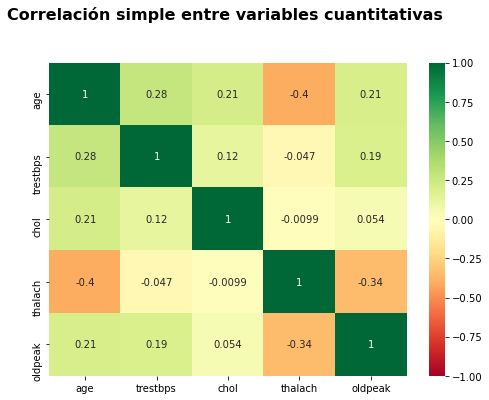

In [140]:
fig, ax = plt.subplots(figsize = (8, 6))
fig.suptitle("Correlación simple entre variables cuantitativas", fontsize = 16, fontweight = "bold", x = 0.43)
sns.heatmap(data[numericas].corr(), vmin = -1, vmax = 1, ax = ax, cmap = "RdYlGn", annot = True)
plt.subplots_adjust(top = 0.85)
plt.show()

# La mayor correlación entre las variables numéricas se da con age y thalach, específicamente una asociación lineal inversa de -0,4.
# Seguidamente se encuentra  el thalach con oldpeak, específicamente de -0,34.

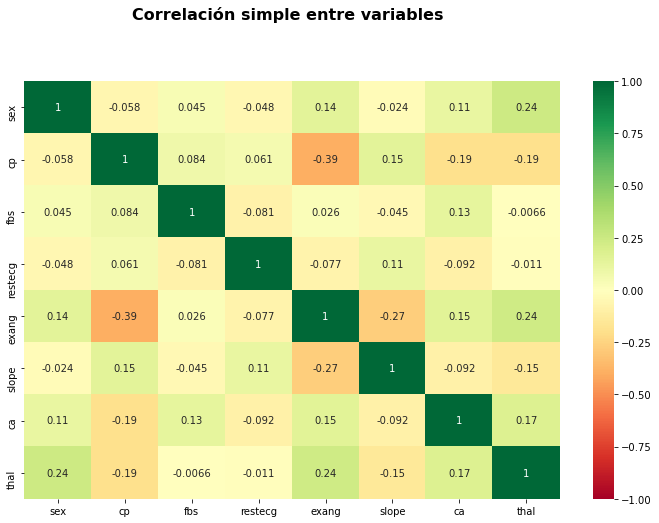

In [141]:
fig, ax = plt.subplots(figsize = (12, 8))
fig.suptitle("Correlación simple entre variables", fontsize = 16, fontweight = "bold", x = 0.43)
sns.heatmap(data[categoricas].corr("kendall"), vmin = -1, vmax = 1, ax = ax, cmap = "RdYlGn", annot = True)
plt.subplots_adjust(top = 0.85)
plt.show()

# con respecto a las variables categóricas las que presentan mayor correlación son cp y exang, específicamente asociación inversa de -0.39.
# Seguido se encuentra el exang con el slope

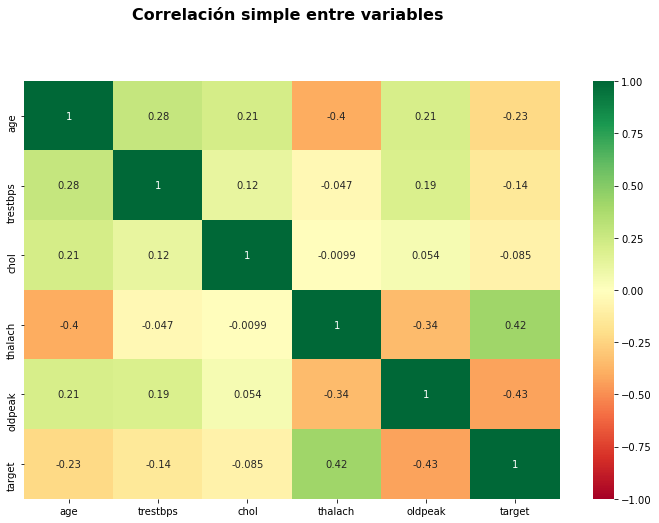

In [142]:
fig, ax = plt.subplots(figsize = (12, 8))
fig.suptitle("Correlación simple entre variables", fontsize = 16, fontweight = "bold", x = 0.43)
sns.heatmap(data[['age', 'trestbps','chol','thalach','oldpeak', 'target']].corr("pearson"), vmin = -1, vmax = 1, ax = ax, cmap = "RdYlGn", annot = True)
plt.subplots_adjust(top = 0.85)
plt.show()

# Ahora bien, con la variable objetivo las variables que presentan mayor asociación son oldpeak de -0,43; thalach con 0,42.

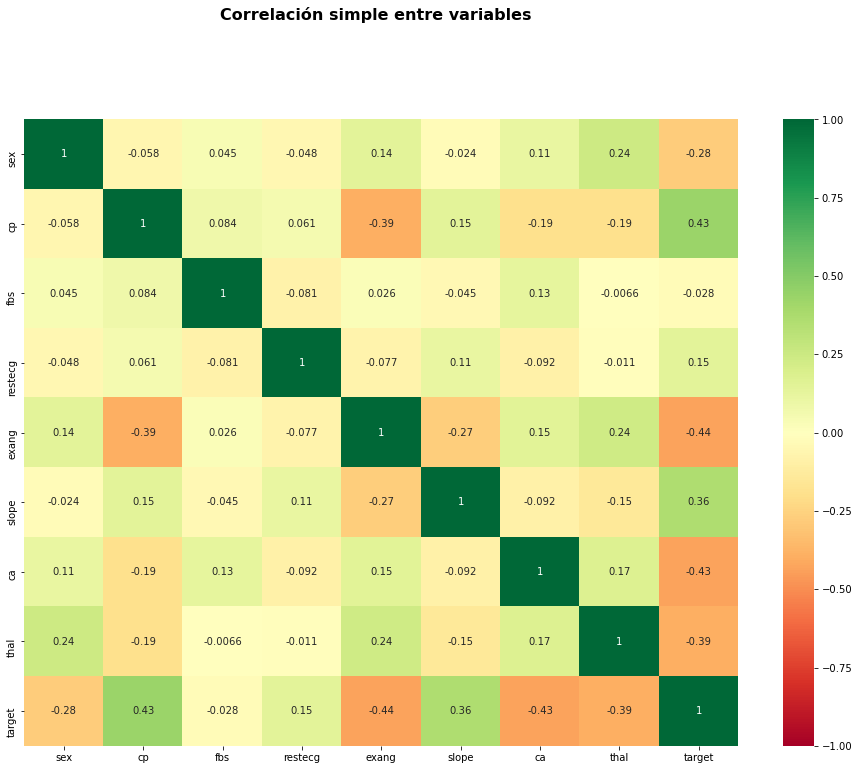

In [143]:
fig, ax = plt.subplots(figsize = (16, 12))
fig.suptitle("Correlación simple entre variables", fontsize = 16, fontweight = "bold", x = 0.43)
sns.heatmap(data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']].corr("kendall"), vmin = -1, vmax = 1, ax = ax, cmap = "RdYlGn", annot = True)
plt.subplots_adjust(top = 0.85)
plt.show()

# Con respecto a las categóricas, las que presentan mayor asociación con la variable objetivo son exang de -0,44; cp de 0,43 y ca de -0,43.

In [144]:
data.isna().sum() # No hay valores nulos.

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Procesamiento

In [145]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [146]:
X = data.iloc[:,0:13]
y = data.iloc[:,13]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Mediante los análisis de correlación se identificó que las variables más importantes para predecir la variable objetivo son:
# - oldpeak, thalach, age, exang, cp, ca, slope y thal

# Igualmente se realizará una regresión lasso para observar las variables cuyos coeficientes son diferentes de cero.
alphas = np.linspace(0.01, 200, 2000)
coefs_lasso = []
for a in alphas:
    lasso = Lasso(alpha=a, normalize = True)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

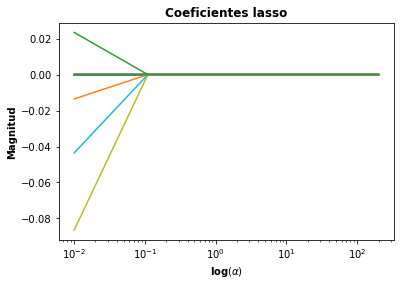

In [148]:
fig, ax = plt.subplots()
ax.plot(alphas, coefs_lasso)
ax.set_xscale("log")
ax.set_title("Coeficientes lasso", fontweight = "bold")
ax.set_xlabel(r"log$(\alpha)$",fontweight = "bold")
ax.set_ylabel("Magnitud",fontweight = "bold")
plt.show()

In [ ]:
lassocv = LassoCV(alphas = alphas, cv = 10, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

In [ ]:
alpha_cv = lassocv.alpha_
lasso01 = Lasso(alpha = alpha_cv, normalize = True)
lasso01.fit(X_train, y_train)
y_pred_lasso = lasso01.predict(X_test)
MAE_lasso01 = mean_absolute_error(y_test, y_pred_lasso)
MSE_lasso01 = mean_squared_error(y_test, y_pred_lasso)
RMSE_lasso01 = np.sqrt(MSE_lasso01)
print("El MAE de la regresión lasso alpha = 0.1 es:",MAE_lasso01)
print("La RMSE de la regresión lasso alpha = 0.1 es:",RMSE_lasso01)

In [151]:
pd.DataFrame({"Coeficientes": lasso01.coef_},index = X.columns)

#oldpeak, thalach, age, exang, cp, ca, slope y thal
#La regresión lasso permite identificar que las variables que más contribuyen a explicar la variable respuesta son cp, exang, oldpeak y ca.
# Por lo tanto las variables que se tendrán en cuenta serán: oldpeak, thalach, age, exang, cp, ca, slope y thal

,Coeficientes
age,-0.000000
sex,-0.000000
cp,0.023426
trestbps,-0.000000
chol,-0.000000
fbs,-0.000000
restecg,0.000000
thalach,0.000000
exang,-0.086477
oldpeak,-0.043546


Valores faltantes en variables categóricas se trataría mediante métodos de imputación de datos como vecino más cercano o k-means cluster. TAmbién el método de maquina de soporte vectorial (SVC por sus siglas en inglés) también es un método supervisado importante.

En variables numéricas los valores faltantes se pueden imputar mediante estadísticos importantes como la media, evidenciar las medidas de posición como percentiles. E incluso mediante modelos lineales se puede predecir el dato faltante dado una seria de variables explicativas.

Para detectar outliers un método importante es la distancia de cook, ya que calcula un umbral dada una distancia entre los datos, también datos influyentes mediante un modelo lineal, delimita los ejemplos que estén por debajo de ese umbral.

Para tratar con datos atípicos se puede estandarizar las variables numéricas, esto también permite tratar la multicolinealidad

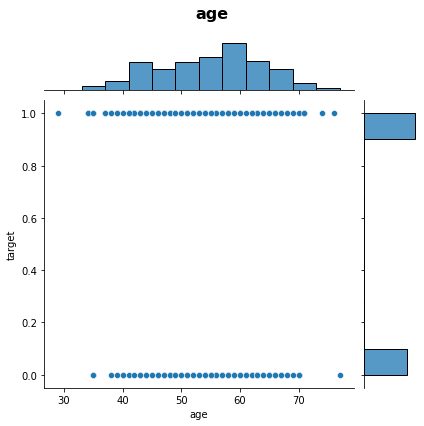

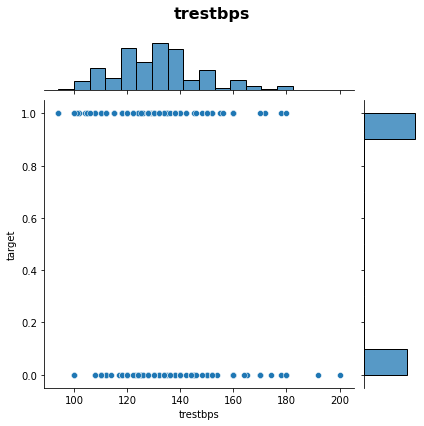

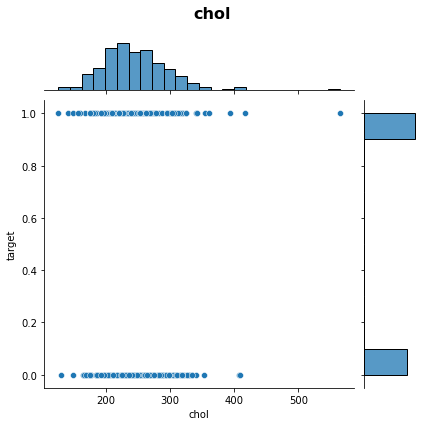

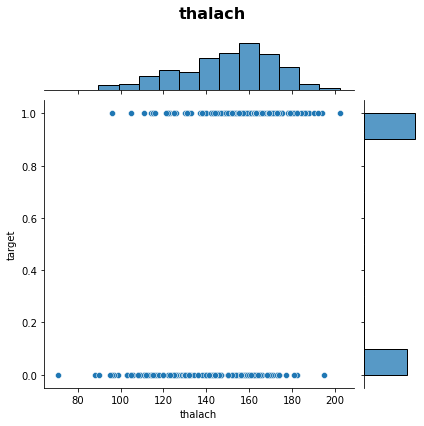

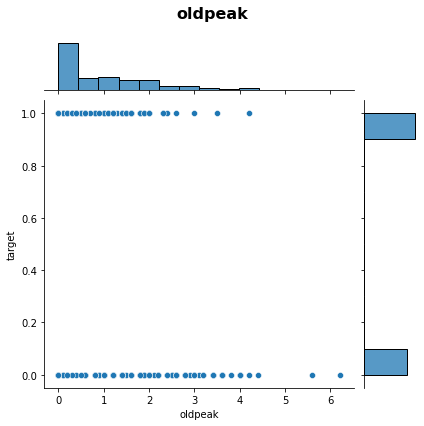

In [152]:
for i in data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].columns:
    var = i
    datos = pd.concat([data['target'], data[var]], axis=1)
    g = sns.jointplot(x = var, y = "target", data = datos)
    g.fig.suptitle(i, fontsize = 16, fontweight = "bold")
    plt.subplots_adjust(top=0.9)
    plt.show()

# Se observa como las variables numéricas presentan valores que se distirbuyen aproximadamente normal. Se observa que age presenta aproximadamente 4 datos atípicos, mientras
# que trestbps presenta 2 datos atípicos. chol presenta un datos atípico que podría ser influyente o leverage. thalach presenta un dato atípico y por último oldpead presenta
# aproximadamente 2 datos atípicos.

# Modelamiento

In [153]:
data2 = data[['oldpeak', 'thalach', 'age', 'exang', 'cp', 'ca', 'slope', 'thal', 'target']]
data2.head()

,oldpeak,thalach,age,exang,cp,ca,slope,thal,target
0,2.3,150,63,0,3,0,0,1,1
1,3.5,187,37,0,2,0,0,2,1
2,1.4,172,41,0,1,0,2,2,1
3,0.8,178,56,0,1,0,2,2,1
4,0.6,163,57,1,0,0,2,2,1


In [154]:
#Es necesario pasar los datos categóricos a one hot encoding
data2=pd.get_dummies(data=data2, columns=['exang','cp','ca','slope','thal'])
data2.head()

,oldpeak,thalach,age,target,exang_0,exang_1,cp_0,cp_1,cp_2,cp_3,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,2.3,150,63,1,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
1,3.5,187,37,1,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,1.4,172,41,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
3,0.8,178,56,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0.6,163,57,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [155]:
data2['target'].value_counts()/data2.shape[0] # Los datos no presentan un desbalanceamiento fuerte.

1    0.544554
0    0.455446
Name: target, dtype: float64

In [156]:
X_train, X_test, y_train, y_test = train_test_split(data2.drop('target', axis=1), data2['target'], test_size=0.2, random_state=25)

In [157]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape + X_test_scaled.shape)

(242, 21, 61, 21)


Los tres modelos más importantes de machine learning que aplicaría serían: Red neuronal, Random Forest y Regresión logística. Estos modelos presentan métodologias distintas las cuales permiten obtener un vagaje más amplio a la hora de tomar una decisión. El mejor modelo resulta ser el Random Forest ya que su estructura permite dividir las variables explicativas en árboles de tal manera que clasifique la variable de interés de la mejor manera posible, además permite ver la importancia de variables.

## Regresión logística

In [122]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_scaled, y_train)

LogisticRegression()

In [123]:
pred_logisticRegr=logisticRegr.predict(X_test_scaled)
score_lr = logisticRegr.score(X_test_scaled, y_test)
print(score_lr)

0.819672131147541


## Random Forest

In [124]:
rf = RandomForestClassifier(n_estimators=5, max_depth=10)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, n_estimators=5)

In [125]:
score_rf=rf.score(X_test_scaled, y_test)
print(score_rf)

0.8524590163934426


In [126]:
pred_rf=rf.predict(X_test_scaled)

In [127]:
n_estimators =  [1,2,3,4,5,6,7,8,9,10]
max_depth = [5,7,10,15,20,30]
min_samples_split = [1, 2, 3]
min_samples_leaf = [1, 2, 3]
param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }

In [ ]:
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 2)
rf_cv=grid_search.fit(X_train_scaled, y_train)

In [129]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=8)

In [130]:
score_rf=grid_search.score(X_test_scaled, y_test)
print(score_rf) # Mejoró el modelo con la grilla de parámetros que se buscó

0.819672131147541


In [131]:
importances1 = rf_cv.best_estimator_.feature_importances_
importances_df1=pd.DataFrame({'importances':importances1,'feauture':data2.drop('target', axis=1).columns})
importances_df1=importances_df1.sort_values(by=['importances'],ascending=False)
importances_df1

,importances,feauture
19,0.181568,thal_2
5,0.169511,cp_0
1,0.132902,thalach
9,0.087028,ca_0
0,0.074985,oldpeak
20,0.069564,thal_3
2,0.067122,age
16,0.055219,slope_2
7,0.040731,cp_2
4,0.034698,exang_1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

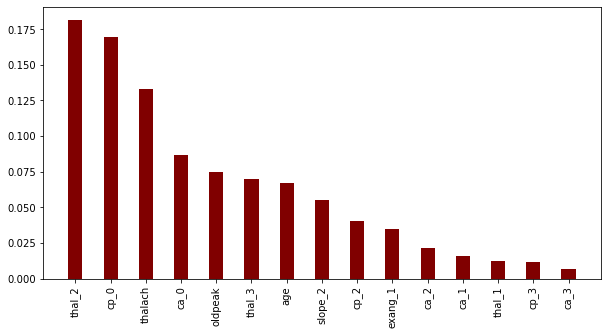

In [132]:
fig = plt.figure(figsize = (10, 5))
plt.bar(importances_df1.feauture[:15],importances_df1.importances[:15], color ='maroon',
        width = 0.4)
plt.xticks( rotation='vertical')

## Red neuronal

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.wrappers.scikit_learn import KerasRegressor
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import GridSearchCV
# Function to create model, required for KerasClassifier

# create model
def create_model(optimizer='adam',learn_rate=0.01, momentum=0,init_mode='normal', activation='relu',dropout_rate=0.0, 
                 weight_constraint=0,neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], kernel_initializer=init_mode, activation=activation, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], kernel_initializer=init_mode, activation=activation, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], kernel_initializer=init_mode, activation=activation, 
                    kernel_constraint=maxnorm(weight_constraint)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer=init_mode, activation='linear'))
    # Compile model
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer, metrics=['accuracy'])
    return model

import numpy
seed = 7
numpy.random.seed(seed)
model = KerasRegressor(build_fn=create_model, verbose=0)

# define the grid search parameters
batch_size = [5, 7]
epochs = [10, 15]
optimizer = ['Adam', 'SGD', 'RMSprop']
learn_rate = [0.01, 0.03]
momentum = [0, 0.03]
init_mode = ['uniform', 'normal']
activation = ['relu', 'sigmoid']
weight_constraint = [1, 2, 3]
dropout_rate = [0.01, 0.03] 
neurons = [5, 10]

param_grid = dict(batch_size=batch_size, epochs=epochs,optimizer=optimizer,learn_rate=learn_rate, momentum=momentum, 
                  init_mode=init_mode, activation=activation, 
                  weight_constraint=weight_constraint, dropout_rate=dropout_rate, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=1, verbose=1, cv=2)
grid_result = grid.fit(X_train_scaled, y_train)

In [170]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), 
                metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
8/8 [==============================] - 1s 3ms/step - loss: 0.7376 - accuracy: 0.5579
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 0.7151 - accuracy: 0.5826
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.5868
Epoch 4/5
8/8 [==============================] - 0s 7ms/step - loss: 0.6786 - accuracy: 0.5909
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.5909


In [171]:
model.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.6393


[0.6852571964263916, 0.6393442749977112]

In [172]:
pred_nn = np.round(model.predict(X_test_scaled))

## Métricas

In [162]:
metrics.confusion_matrix(y_test, pred_logisticRegr)

array([[22,  7],
       [ 4, 28]], dtype=int64)

In [163]:
metrics.confusion_matrix(y_test, pred_rf)

array([[23,  6],
       [ 3, 29]], dtype=int64)

In [173]:
metrics.confusion_matrix(y_test, pred_nn)

array([[ 9, 20],
       [ 2, 30]], dtype=int64)

In [165]:
print(classification_report(y_test, pred_logisticRegr)) # Modelo 1

              precision    recall  f1-score   support

           0       0.85      0.76      0.80        29
           1       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [166]:
print(classification_report(y_test, pred_rf)) # modelo 2

              precision    recall  f1-score   support

           0       0.88      0.79      0.84        29
           1       0.83      0.91      0.87        32

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [174]:
print(classification_report(y_test, pred_nn)) # modelo 3

              precision    recall  f1-score   support

           0       0.82      0.31      0.45        29
           1       0.60      0.94      0.73        32

    accuracy                           0.64        61
   macro avg       0.71      0.62      0.59        61
weighted avg       0.70      0.64      0.60        61

